In [2]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

### 画像の読み込み

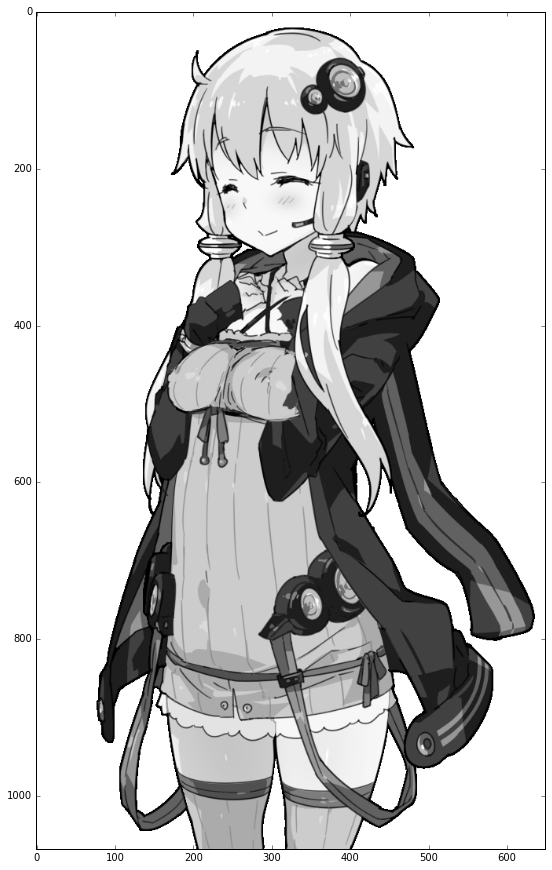

In [5]:
# pngの場合は背景透過未対応
# http://seiga.nicovideo.jp/seiga/im5494168
img = cv2.imread('img/10.jpg')
 
# グレースケールに変換
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 出力
plt.figure(figsize=(30,15))
plt.imshow(gray, cmap=plt.get_cmap('gray'))

### エッジの抽出

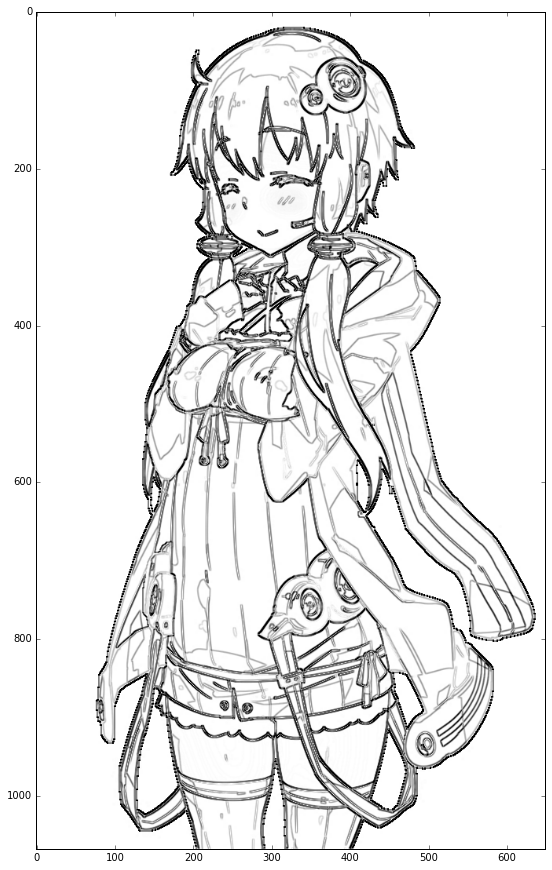

In [4]:
# Sobelフィルタでx方向のエッジ検出
gray_sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0)

# Sobelフィルタでy方向のエッジ検出
gray_sobely = cv2.Sobel(gray, cv2.CV_32F, 0, 1)

# 8ビット符号なし整数変換
gray_abs_sobelx = cv2.convertScaleAbs(gray_sobelx) 
gray_abs_sobely = cv2.convertScaleAbs(gray_sobely)
 
# 重み付き和
gray_sobel_edge = cv2.addWeighted(gray_abs_sobelx, 0.5, gray_abs_sobely, 0.5, 0) 

# 出力
plt.figure(figsize=(30,15))
plt.imshow(255 - gray_sobel_edge, cmap=plt.get_cmap('gray'))

### 薄めの色（ゴミ）を飛ばす

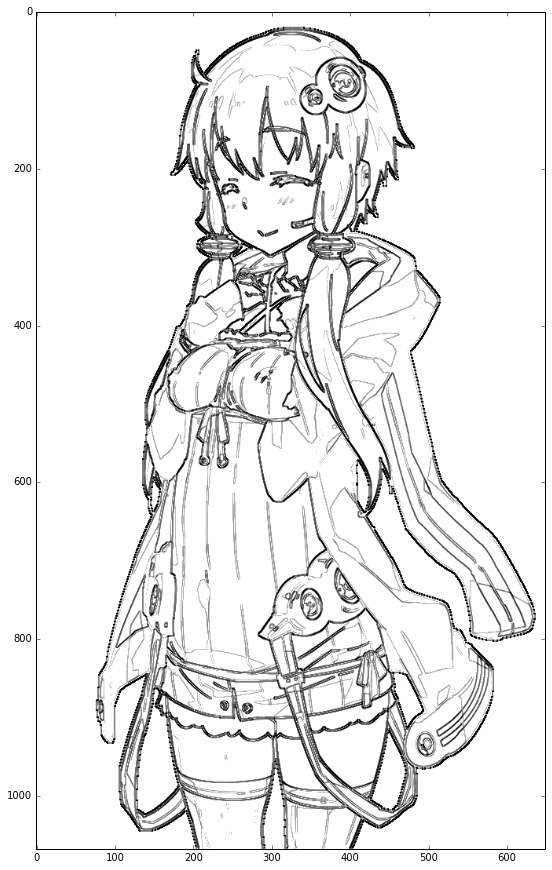

In [6]:
img = gray_sobel_edge

# しきい値による色域範囲の絞込
threshold = 60
max_pixel = 255
ret, img = cv2.threshold(img, threshold, max_pixel, cv2.THRESH_TOZERO)

# 出力
plt.figure(figsize=(30,15))
plt.imshow(255 - img, cmap=plt.get_cmap('gray'))

img2 = img

### オプション：マスク画像を作成する

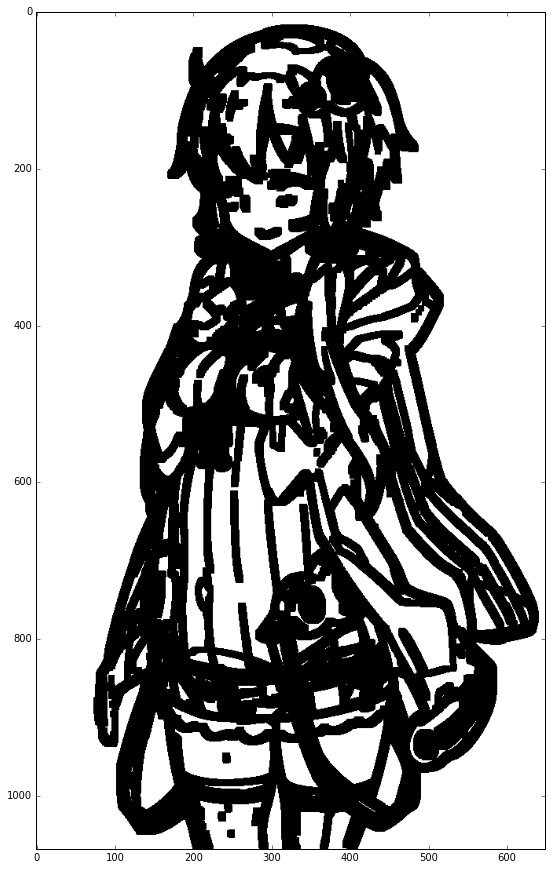

In [9]:
img = img2

# 線の収縮（ゴミの削除）
kernel = np.ones((1,1), np.uint8)
img = cv2.erode(img, kernel, iterations=1)

# 線の膨張（マスクの範囲の膨張）
kernel = np.ones((8,8), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)

# しきい値による色域範囲の絞込
threshold = 0
max_pixel = 255
ret, img = cv2.threshold(img, threshold, max_pixel, cv2.THRESH_BINARY)

# 出力
plt.figure(figsize=(30,15))
plt.imshow(255 -img, cmap=plt.get_cmap('gray'))

img3 = img

### オプション：マスクを適応する

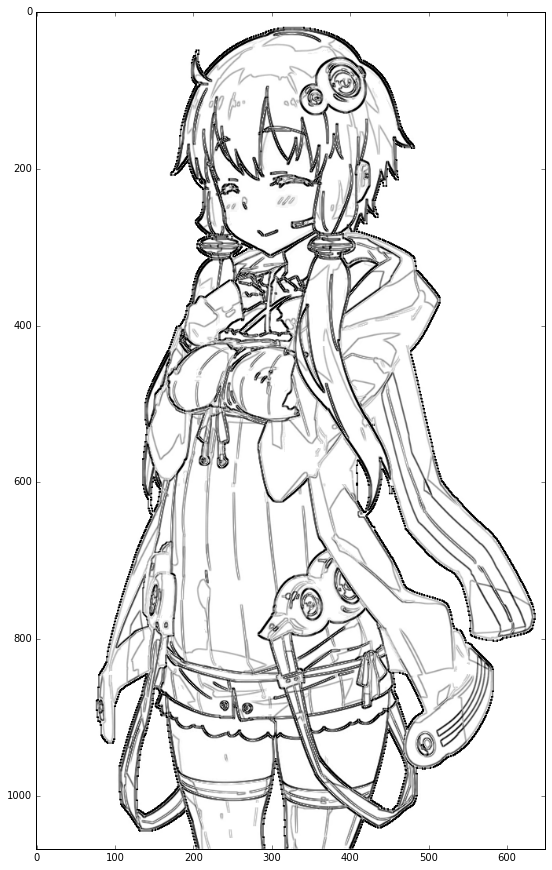

In [10]:
img = img3

# マスクを適応する
img = cv2.bitwise_and(gray_sobel_edge, img)

# 出力
plt.figure(figsize=(30,15))
plt.imshow(255 - img, cmap=plt.get_cmap('gray'))